# Data ingestion

In [1]:
import numpy as np
import pandas as pd

In [2]:
coupon_data = pd.read_csv('data_from_2024_04.csv')

/var/folders/pn/pclby9617131bypw8s71537r0000gn/T/ipykernel_90756/1156261450.py:1: DtypeWarning: Columns (34,36,38,39,40,41,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  coupon_data = pd.read_csv('data_from_2024_04.csv')


In [3]:
coupon_data.shape

(2654089, 47)

In [4]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'mrp_total', 'mrp_items_total',
       'show_on_only_promotion_qty', 'show_on_app'],
      dtype='object')

In [5]:
coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654089 entries, 0 to 2654088
Data columns (total 47 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          int64  
 1   discount_code               object 
 2   applied_count               int64  
 3   failed                      bool   
 4   failed_reason               object 
 5   created_at                  object 
 6   updated_at                  object 
 7   cart_id                     int64  
 8   checkout_id                 float64
 9   token                       object 
 10  subtotal_price              float64
 11  total_price                 float64
 12  order_name                  object 
 13  is_payment_online           bool   
 14  verified_cart               bool   
 15  final_subtotal_price        float64
 16  final_total_price           float64
 17  cart_state                  object 
 18  final_discount              float64
 19  final_shipping       

# Coupon Success vs. Failure Rate

In [6]:
total_coupon_applied= len(coupon_data)
print(total_coupon_applied)

2654089


In [7]:
total_coupon_failed = len(coupon_data[coupon_data['failed']==True])
print(total_coupon_failed)

529633


In [8]:
# Step 1: Coupon Success vs. Failure Rate
failure_rate = round((total_coupon_failed / total_coupon_applied) * 100, 2)
print(failure_rate)

19.96


## Identify Most Common Failure Reasons

In [9]:
# Count occurrences of each failure reason
failure_reasons = coupon_data[coupon_data['failed'] == True]['failed_reason'].value_counts(normalize=True) * 100

# Convert to DataFrame
failure_reasons_df = failure_reasons.reset_index()
failure_reasons_df.columns = ['Failure Reason', 'Failure Percentage']

In [10]:
failure_reasons_df

,Failure Reason,Failure Percentage
0,You are not eligible for this discount,19.818629
1,Discount code is valid for a minimum ₹699.0 ca...,15.592495
2,Discount code is valid for a minimum ₹799.0 ca...,9.780169
3,Discount code is valid for a minimum ₹699 cart...,8.939964
4,Invalid discount code,6.717482
...,...,...
76,Discount code is valid for a minimum Rs.899 ca...,0.000189
77,Discount code is valid for a minimum ₹750.0 ca...,0.000189
78,Please add minimum 749.0 items to avail this d...,0.000189
79,Discount code is valid for a cart having minim...,0.000189


### Top 3 coupon code used for failure reason.

In [18]:
# Step 1: Get top 3 coupon codes per failure reason
failed_coupons = coupon_data[coupon_data['failed'] == True]

# Group and count
grouped = failed_coupons.groupby(['failed_reason', 'discount_code']).size().reset_index(name='count')

# Sort and get top 3 per failure reason
top3 = grouped.sort_values(['failed_reason', 'count'], ascending=[True, False])
top3 = top3.groupby('failed_reason').head(3)

# Step 2: Aggregate top 3 coupon codes and counts as lists or strings
aggregated = top3.groupby('failed_reason').agg({
    'discount_code': lambda x: ', '.join(x),
    'count': lambda x: ', '.join(map(str, x))
}).reset_index()

aggregated.columns = ['Failure Reason', 'Top 3 Coupon Codes', 'Top 3 Coupon Counts']

# Step 3: Merge with your original failure_reasons_df
final_df = failure_reasons_df.merge(aggregated, on='Failure Reason', how='left')

# Optional: Sort by failure percentage descending
final_df = final_df.sort_values('Failure Percentage', ascending=False).reset_index(drop=True)

In [23]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'mrp_total', 'mrp_items_total',
       'show_on_only_promotion_qty', 'show_on_app'],
      dtype='object')

In [20]:
final_df.head(10)

,Failure Reason,Failure Percentage,Top 3 Coupon Codes,Top 3 Coupon Counts
0,You are not eligible for this discount,19.818629,"NEWHABIT50, FLAT20, ABFLAT50P","58701, 26834, 5461"
1,Discount code is valid for a minimum ₹699.0 ca...,15.592495,"NEWHABIT50, ZOMANAT50, NHBDAY50","57874, 11073, 5500"
2,Discount code is valid for a minimum ₹799.0 ca...,9.780169,"NEWHABIT50, HOLI50, MONSOON50","8780, 6086, 5790"
3,Discount code is valid for a minimum ₹699 cart...,8.939964,"NEWHABIT50, FRESH35, FREESPA","25815, 20973, 367"
4,Invalid discount code,6.717482,"NEWHABIT, NEWHABBIT50, NETHABIT50","1267, 1125, 635"
5,Discount code is valid for a minimum ₹599.0 ca...,6.314184,"FLAT20, FREEHANDMALAI, NUTRILOVE20","22938, 10308, 196"
6,Discount Code is not active,5.628048,"MONSOON50, NY2025, WINTER50","6053, 4938, 3947"
7,Discount code has already been used,3.995219,"NEWHABIT50, NHCREDOFS, FREEHANDMALAI","17083, 788, 685"
8,Discount Code is not applicable on above products,3.835108,"NEWHABIT50, FREEHANDMALAI, FREESPA","2910, 1952, 1725"
9,Discount code is valid for a minimum ₹499.0 ca...,3.497705,"FREEUBTAN, FREEHANDMALAI, FREEMALAI","10361, 7472, 583"


In [21]:
#### failure percentage for each failure reason
final_df.to_csv('failure_reasons_insight.csv',index=False)

##  Failure Rate by Discount Type

In [12]:
coupon_data['discount_type'].value_counts()

discount_type
percentage      2124600
fixed_amount      73248
Name: count, dtype: int64

In [210]:
# customer more focused on discount on sub_total_price not on getting free product

In [211]:
# Count failures by discount type
failure_by_type = coupon_data.groupby('discount_type')['failed'].mean() * 100

# Convert to DataFrame
failure_by_type_df = failure_by_type.reset_index()
failure_by_type_df.columns = ['Discount Type', 'Failure Rate (%)']


In [213]:
# Display results for complete data set
failure_by_type_df

,Discount Type,Failure Rate (%)
0,fixed_amount,9.343600
1,percentage,10.452179


## For each coupon failure rate

In [214]:
# Group by coupon code and failure reason
failure_by_coupon = coupon_data.groupby(['discount_code'])['failed'].agg(['count', 'sum'])

# Calculate failure rate
failure_by_coupon['failure_rate'] = (failure_by_coupon['sum'] / failure_by_coupon['count']) * 100

# Rename columns
failure_by_coupon = failure_by_coupon.rename(columns={'count': 'total_attempts', 'sum': 'total_failures'})

# Sort by failure rate (descending)
failure_by_coupon = failure_by_coupon.sort_values(by='failure_rate', ascending=False)

# Reset index for readability
failure_by_coupon = failure_by_coupon.reset_index()

In [215]:
total_coupon_code_used = len(failure_by_coupon)
print(total_coupon_code_used)

45381


In [238]:
failure_by_coupon

,discount_code,total_attempts,total_failures,failure_rate
0,!,12,12,100.0
1,NETHAB20,1,1,100.0
2,NETHABBIT,2,2,100.0
3,NETHABBIT150,1,1,100.0
4,NETHABBIT30,1,1,100.0
...,...,...,...,...
45376,GPAY50-GE2TGOBQGA3Q,2,0,0.0
45377,GPAY50-GE2TGNZYHE2Q,3,0,0.0
45378,NHCRBOGO-GI4DONBYGIYA,4,0,0.0
45379,NHCRBOGO-GI4DONJRGY4A,1,0,0.0


In [216]:
failure_by_coupon['failure_rate'].value_counts()

failure_rate
0.000000      33760
100.000000    11075
50.000000       186
33.333333       116
25.000000        44
              ...  
42.857143         1
43.750000         1
44.764785         1
45.133487         1
24.010914         1
Name: count, Length: 133, dtype: int64

In [217]:
# Count failure reasons
failure_reasons = coupon_data[coupon_data['failed'] == True].groupby('failed_reason')['failed'].count()

# Sort by most common failure reasons
failure_reasons = failure_reasons.sort_values(ascending=False)

In [221]:
failure_reasons.sum()

np.int64(529633)

In [222]:
failure_reasons.head(15).sum()

np.int64(509428)

In [223]:
failure_reasons.head(15)

failed_reason
You are not eligible for this discount                         104966
Discount code is valid for a minimum ₹699.0 cart value only     82583
Discount code is valid for a minimum ₹799.0 cart value only     51799
Discount code is valid for a minimum ₹699 cart value only       47349
Invalid discount code                                           35578
Discount code is valid for a minimum ₹599.0 cart value only     33442
Discount Code is not active                                     29808
Discount code has already been used                             21160
Discount Code is not applicable on above products               20312
Discount code is valid for a minimum ₹499.0 cart value only     18525
Discount code is valid for a minimum ₹899.0 cart value only     18486
Discount code is valid for a minimum ₹499 cart value only       14158
Discount code is valid for a minimum ₹1199 cart value only      12041
Discount code is valid for a minimum ₹599 cart value only       11565
Discou

In [224]:
import pandas as pd

# Convert 'created_at' to datetime with explicit format handling
coupon_data['created_at'] = pd.to_datetime(coupon_data['created_at'], errors='coerce', utc=True)

# Extract year and month
coupon_data['year_month'] = coupon_data['created_at'].dt.to_period('M')

# Print sample data to confirm conversion
print(coupon_data[['created_at', 'year_month']].head())

                        created_at year_month
0 2024-03-31 00:00:24.155520+00:00    2024-03
1 2024-03-31 00:00:53.337039+00:00    2024-03
2 2024-03-31 00:04:37.223067+00:00    2024-03
3 2024-03-31 00:04:52.461667+00:00    2024-03
4 2024-03-31 00:05:16.804853+00:00    2024-03


In [225]:
print(coupon_data['created_at'].dtype)
print(coupon_data['created_at'].head(10))


datetime64[ns, UTC]
0   2024-03-31 00:00:24.155520+00:00
1   2024-03-31 00:00:53.337039+00:00
2   2024-03-31 00:04:37.223067+00:00
3   2024-03-31 00:04:52.461667+00:00
4   2024-03-31 00:05:16.804853+00:00
5   2024-03-31 00:05:41.075850+00:00
6   2024-03-31 00:06:10.559752+00:00
7   2024-03-31 00:06:31.040503+00:00
8   2024-03-31 00:09:20.296887+00:00
9   2024-03-31 00:16:23.981956+00:00
Name: created_at, dtype: datetime64[ns, UTC]


In [226]:
# Group by failure reason and month
failure_monthly = coupon_data[coupon_data['failed'] == True].groupby(['year_month', 'failed_reason']).size().reset_index(name='failure_count')

# Pivot the table to show failure reasons as columns (Optional, for readability)
failure_pivot = failure_monthly.pivot(index='year_month', columns='failed_reason', values='failure_count').fillna(0)

In [227]:
failure_pivot= failure_pivot.T

In [228]:
failure_pivot.columns

PeriodIndex(['2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
             '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02',
             '2025-03'],
            dtype='period[M]', name='year_month')

In [229]:
# Add a new column 'total' that sums all values row-wise
failure_pivot['total'] = failure_pivot.sum(axis=1)

In [230]:
# Sort by 'total' in descending order and get top 15 rows
top_15_failures = failure_pivot.sort_values(by='total', ascending=False).head(15)


In [231]:
top_15_failures

year_month,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,total
failed_reason,,,,,,,,,,,,,,
You are not eligible for this discount,210.0,6009.0,5676.0,7864.0,8054.0,7538.0,8622.0,10681.0,10414.0,13146.0,9107.0,9063.0,8582.0,104966.0
Discount code is valid for a minimum ₹699.0 cart value only,0.0,5523.0,4230.0,3051.0,1744.0,4928.0,6988.0,9164.0,8628.0,6784.0,8165.0,11107.0,12271.0,82583.0
Discount code is valid for a minimum ₹799.0 cart value only,57.0,377.0,244.0,2686.0,3802.0,10635.0,3524.0,5977.0,5377.0,3260.0,5973.0,4084.0,5803.0,51799.0
Discount code is valid for a minimum ₹699 cart value only,69.0,7053.0,10323.0,8654.0,8503.0,2416.0,1361.0,1171.0,1480.0,1498.0,1626.0,1672.0,1523.0,47349.0
Invalid discount code,94.0,3915.0,4773.0,3924.0,3608.0,2841.0,2507.0,2502.0,2096.0,2049.0,2625.0,2442.0,2202.0,35578.0
Discount code is valid for a minimum ₹599.0 cart value only,0.0,2995.0,2910.0,2068.0,2259.0,2055.0,1651.0,1574.0,3109.0,3326.0,3842.0,3798.0,3855.0,33442.0
Discount Code is not active,11.0,165.0,47.0,1057.0,2637.0,5397.0,607.0,2462.0,4305.0,1201.0,5134.0,3660.0,3125.0,29808.0
Discount code has already been used,46.0,857.0,784.0,1491.0,1489.0,1571.0,2044.0,1838.0,2057.0,2266.0,2783.0,2029.0,1905.0,21160.0
Discount Code is not applicable on above products,49.0,1052.0,829.0,1067.0,1687.0,1907.0,1251.0,1355.0,1758.0,1810.0,3565.0,1996.0,1986.0,20312.0


<Figure size 1200x600 with 0 Axes>

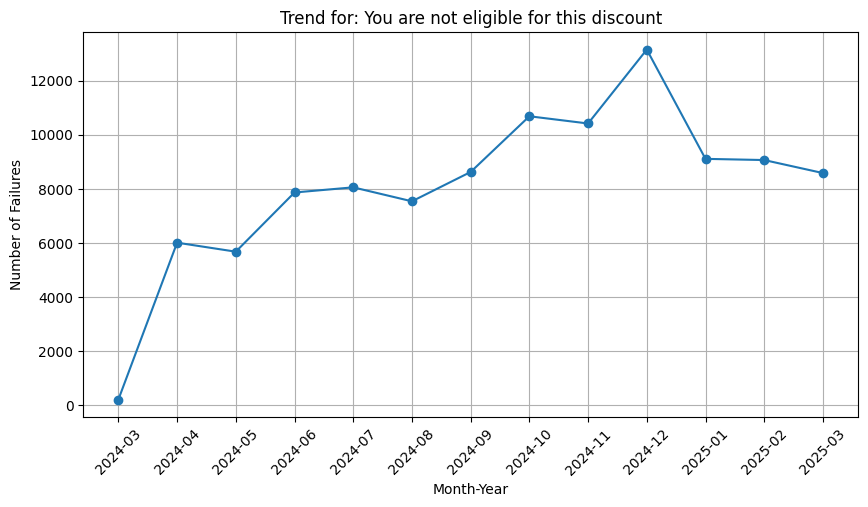

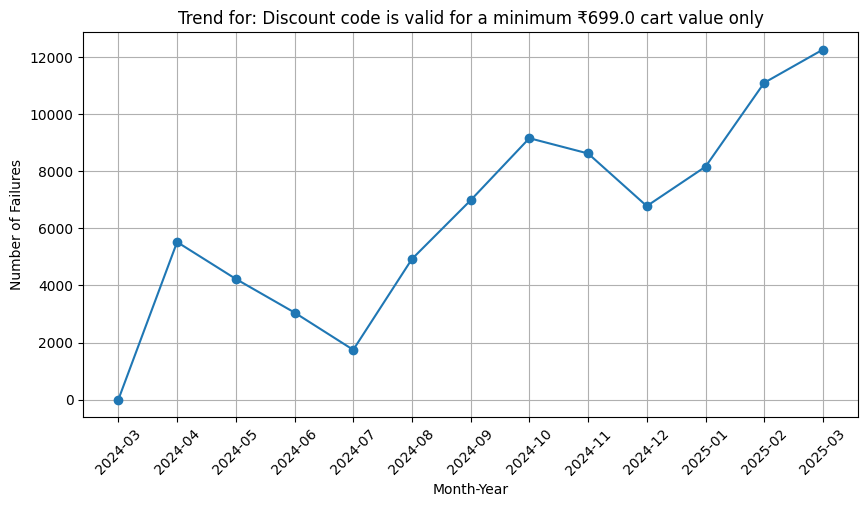

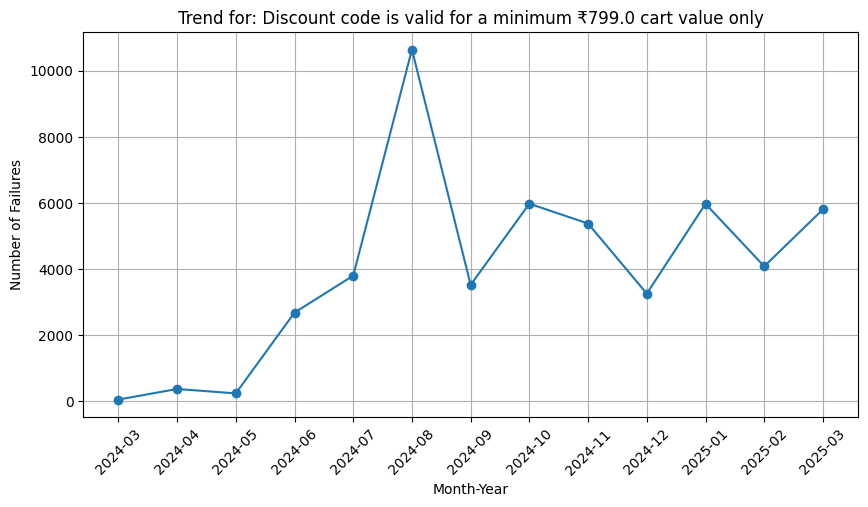

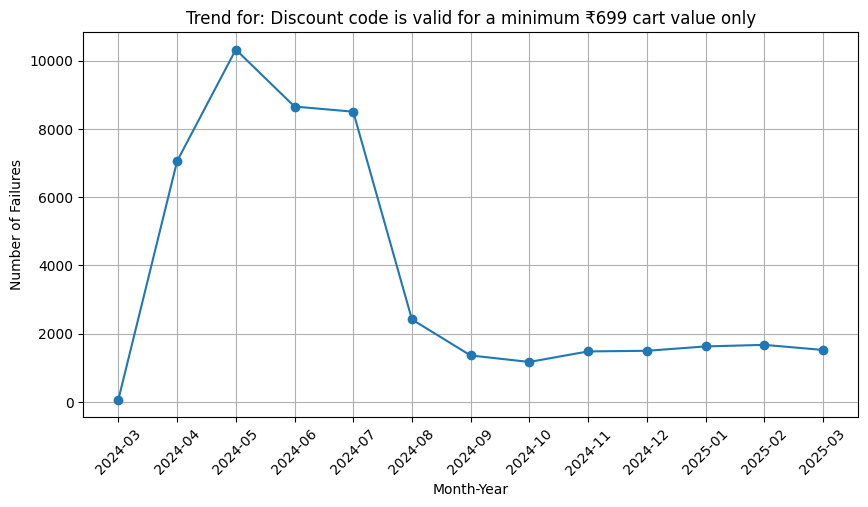

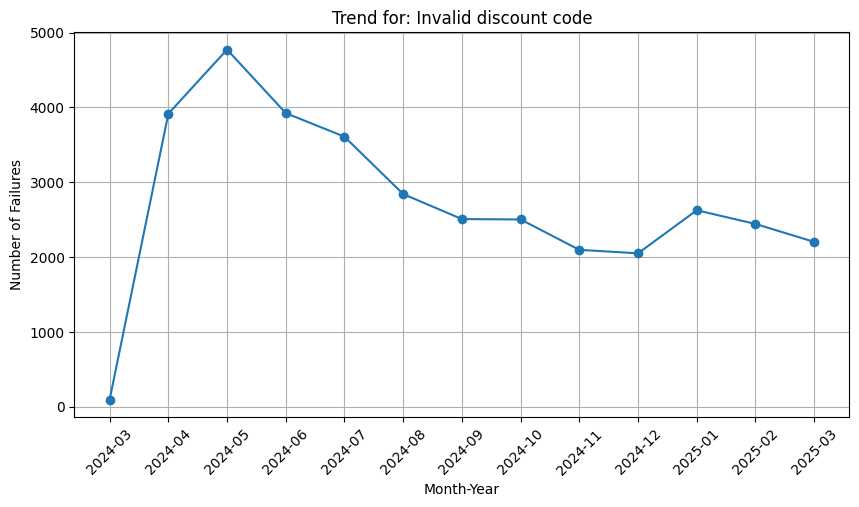

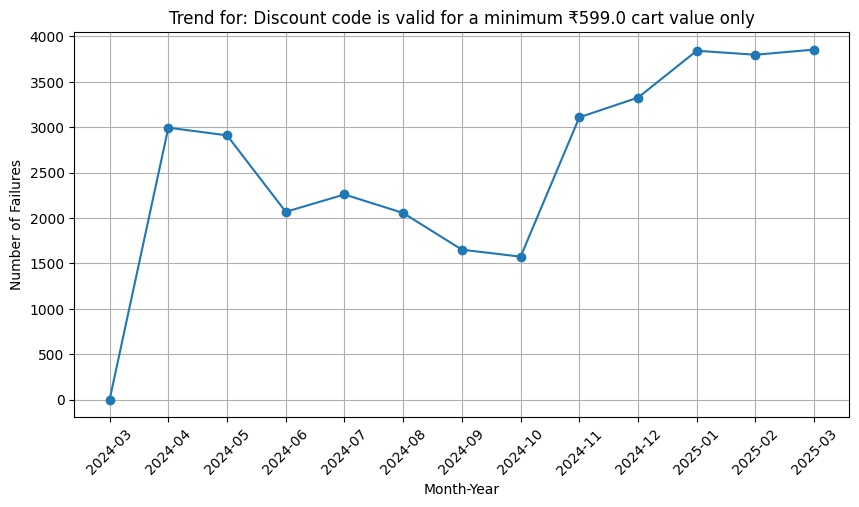

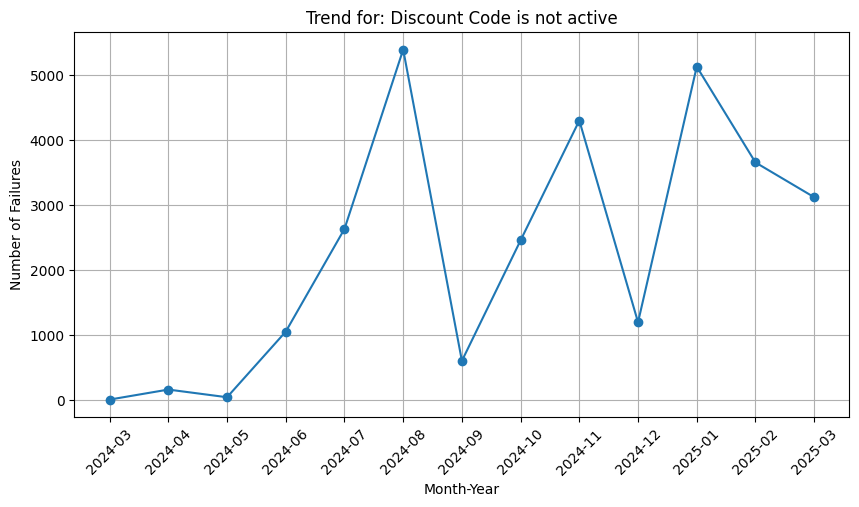

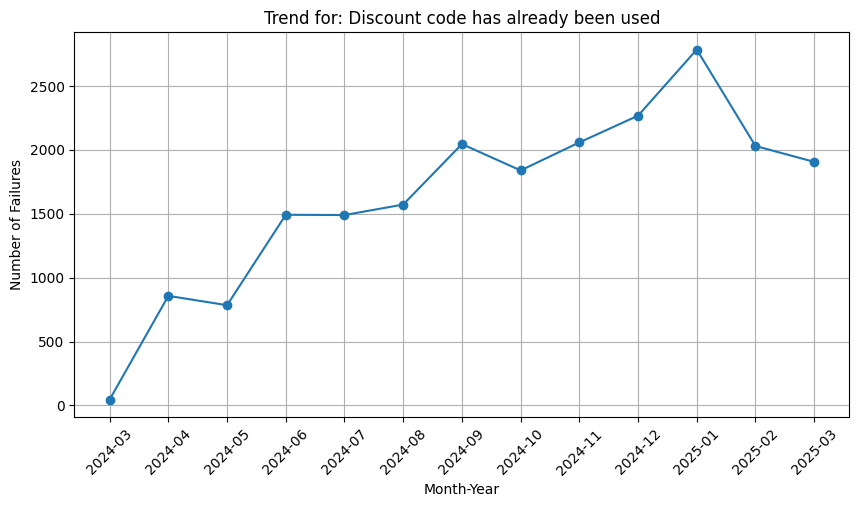

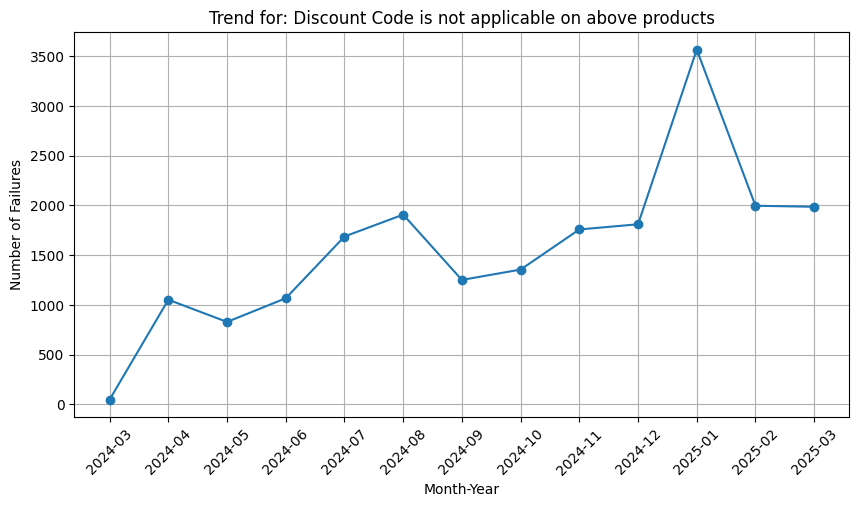

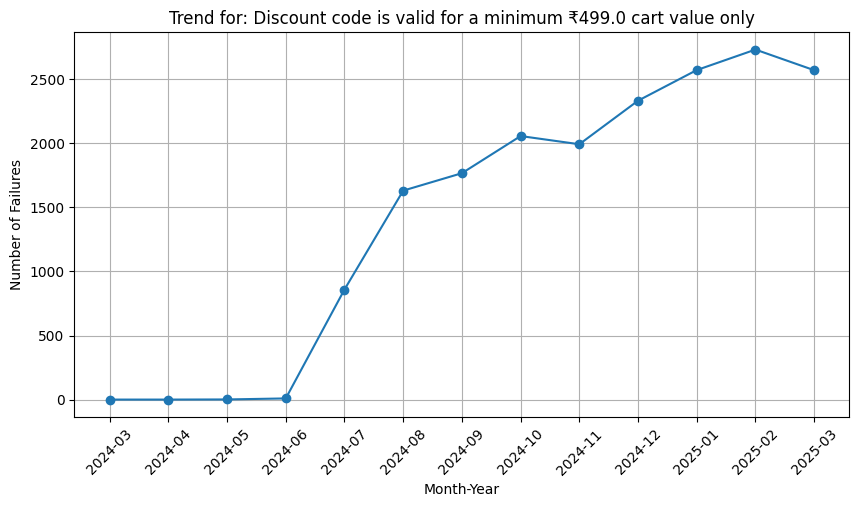

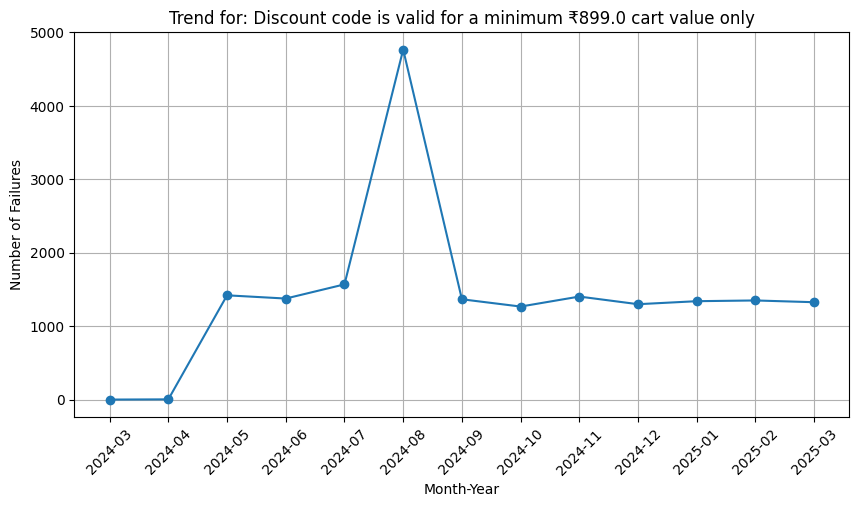

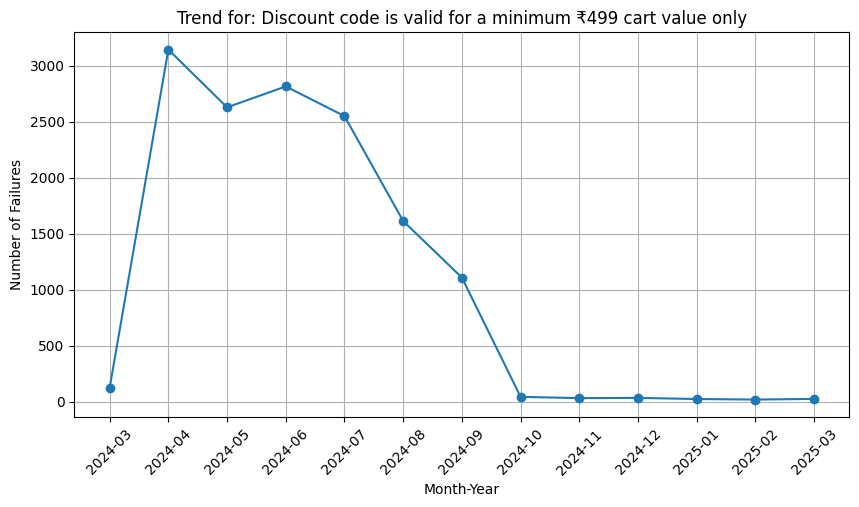

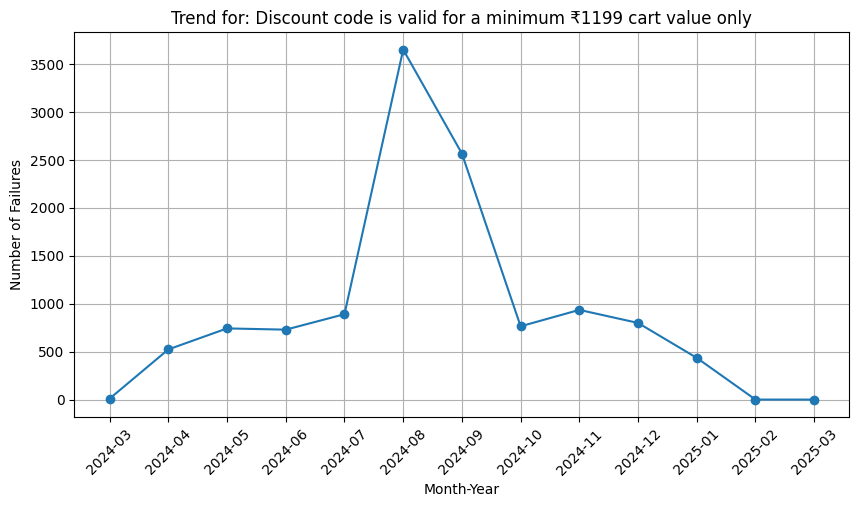

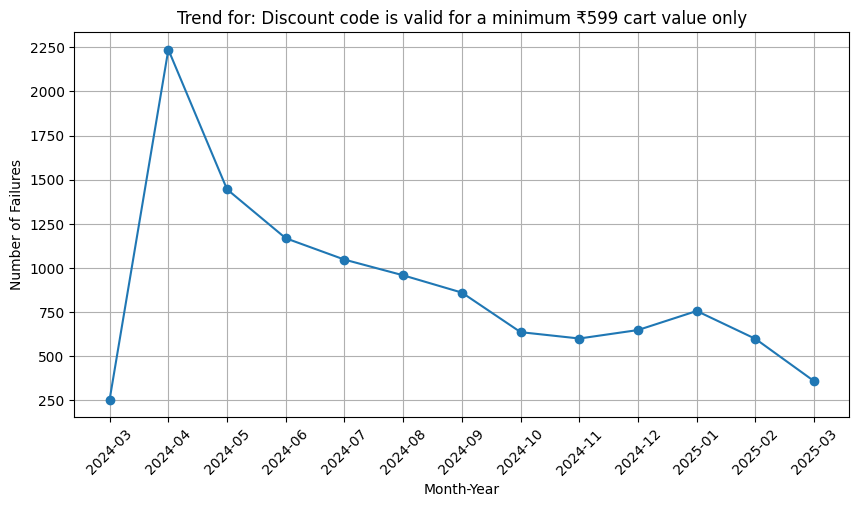

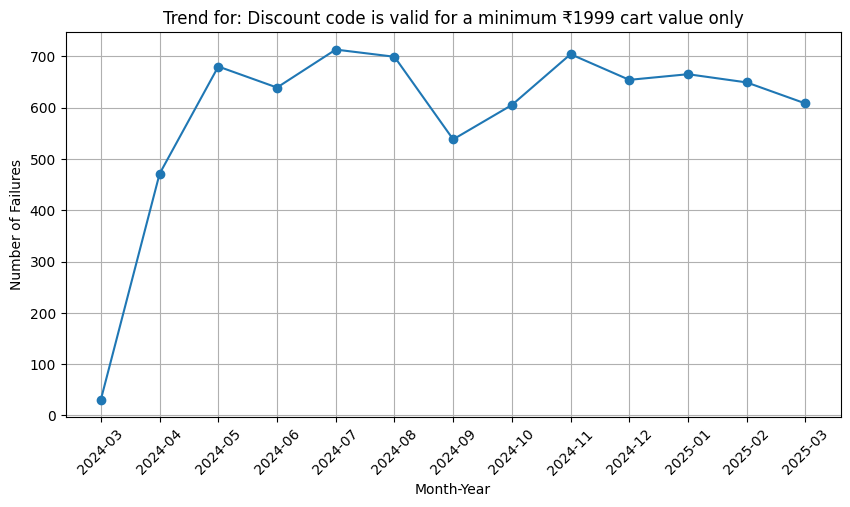

In [237]:
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(12, 6))
# Transpose DataFrame to have months as rows and failure reasons as columns
top_15_failures_T = top_15_failures.drop(columns=['total']).T



# Loop through each failure reason and plot separately
for failure_reason in top_15_failures_T.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(top_15_failures_T.index.astype(str), top_15_failures_T[failure_reason], marker='o', linestyle='-')
    
    # Customizations
    plt.xticks(rotation=45)
    plt.xlabel("Month-Year")
    plt.ylabel("Number of Failures")
    plt.title(f"Trend for: {failure_reason}")
    plt.grid(True)
    
    # Show the plot
    plt.show()


In [234]:
# Count total carts with coupons
total_carts_with_coupons = coupon_data[coupon_data['discount_code'].notna()]['cart_id'].nunique()
coupon_data['cart_state'].value_counts()
# Count abandoned carts using the cart_state column
abandoned_carts = coupon_data[(coupon_data['discount_code'].notna()) & (coupon_data['cart_state'] == 'Created')]['cart_id'].nunique()
# Calculate abandonment rate
abandonment_rate = round((abandoned_carts / total_carts_with_coupons) * 100, 2)
print(f"Total Carts with Coupons: {total_carts_with_coupons}")
print(f"Abandoned Carts: {abandoned_carts}")
print(f"Cart Abandonment Rate: {abandonment_rate}%")

Total Carts with Coupons: 978893
Abandoned Carts: 486261
Cart Abandonment Rate: 49.67%


In [235]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'mrp_total', 'mrp_items_total',
       'show_on_only_promotion_qty', 'show_on_app', 'year_month'],
      dtype='object')

In [236]:
# Count total carts with coupons
total_carts_with_coupons = coupon_data[coupon_data['discount_code'].notna()]['cart_id'].nunique()

# Count abandoned carts using the cart_state column
abandoned_carts = coupon_data[(coupon_data['discount_code'].notna()) & 
                              (coupon_data['cart_state'] == 'Created')]['cart_id'].nunique()

# Calculate abandonment rate
abandonment_rate = round((abandoned_carts / total_carts_with_coupons) * 100, 2)

# Calculate abandoned cart revenue
abandoned_cart_revenue = coupon_data[(coupon_data['discount_code'].notna()) & 
                                     (coupon_data['cart_state'] == 'Created')]['mrp_total'].sum()

print(f"Total Carts with Coupons: {total_carts_with_coupons}")
print(f"Abandoned Carts: {abandoned_carts}")
print(f"Cart Abandonment Rate: {abandonment_rate}%")
print(f"Abandoned Cart Revenue: ₹{abandoned_cart_revenue:,.2f}")  # Formatting for better readability


Total Carts with Coupons: 978893
Abandoned Carts: 486261
Cart Abandonment Rate: 49.67%
Abandoned Cart Revenue: ₹874,023,500.06


In [148]:
x = []
for i in coupon_data.columns:
    x.append((i, coupon_data[i].isna().sum()))  # Append as a tuple

# Convert to DataFrame
null_df = pd.DataFrame(x, columns=['Column Name', 'Null Count'])

In [149]:
null_df.to_csv('nulldf.csv')

In [150]:
x = coupon_data.iloc[:, 0:34]

In [151]:
column_to_drop = ['checkout_id','recommended_discount_id','updated_at']
x.drop(columns=column_to_drop,inplace=True)

In [152]:
x.shape

(2646376, 31)

In [153]:
x.dropna(subset=['discount_code'], inplace=True)

In [154]:
x.shape

(2645208, 31)

In [155]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'show_on_only_promotion_qty', 'show_on_app',
       'year_month'],
      dtype='object')

In [156]:
with open("coupon_data_summary.txt", "w", encoding="utf-8") as f:
    for i in coupon_data.columns:
        f.write(f"{i}\n")
        f.write(f"{coupon_data[i].unique()}\n")
        f.write("-" * 50 + "\n")

In [93]:
# percentage of cart coverted into orders
y = coupon_data['cart_id'].nunique()
x = coupon_data[coupon_data['order_name'].notnull()]['cart_id'].nunique()
(x/y)*100

54.07874818973799

In [161]:
# Count unique discount codes per cart_id
coupon_counts = coupon_data.groupby('order_name')['discount_code'].nunique().reset_index()

# Rename column for clarity
coupon_counts.rename(columns={'discount_code': 'coupon_count'}, inplace=True)

# Sort by coupon_count in descending order
coupon_counts = coupon_counts.sort_values(by='coupon_count', ascending=False)

In [162]:
coupon_counts

,order_name,coupon_count
440803,NH-2614482,85
238881,NH-2321132,41
29921,NH-2021251,39
414918,NH-2577455,36
331119,NH-2459050,35
...,...,...
507108,NH-2710292,0
29277,NH-2020335,0
20137,NH-2007099,0
249905,NH-2338170,0


In [164]:
order_count = coupon_counts.groupby('coupon_count')['order_name'].count().reset_index()

# Rename column for clarity
order_count.rename(columns={'order_name': 'order_count'}, inplace=True)
# Sort by coupon_count in descending order
order_counts = order_count.sort_values(by='order_count', ascending=False)

In [166]:
coupon_data['order_name'].nunique()

528013

In [174]:
order_counts['order_count'].head(6).sum()

np.int64(523000)

In [175]:
order_counts.head(6)

,coupon_count,order_count
1,1,269745
2,2,124398
3,3,69042
4,4,35881
5,5,16691
6,6,7243


In [186]:
coupon_data.shape

(2646376, 45)

In [187]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'show_on_only_promotion_qty', 'show_on_app'],
      dtype='object')

In [188]:
coupon_data.sample()

,id,discount_code,applied_count,failed,failed_reason,created_at,updated_at,cart_id,checkout_id,token,...,min_amount,is_active,suggestion_amount_window,show_only_on_checkout,background_color,image_url,show_on_new_website,recommendation_tag,show_on_only_promotion_qty,show_on_app
2028751,3241177,FREECOMBO,2,False,NaN,2025-01-08 09:31:56.063081+00:00,2025-01-08 09:31:56.264619+00:00,34351145,NaN,PpFxYdx4eQGewa8A3OFr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
len(coupon_data['cart_id'].unique())

976378

In [222]:
import pandas as pd

# Ensure 'failed' is boolean, then convert to int
coupon_data['failed'] = coupon_data['failed'].astype(int)

# Grouping data per cart_id
result = coupon_data.groupby('cart_id').agg(
    total_coupons_applied=('discount_code', 'count'),
    total_coupons_failed=('failed', 'sum'),
    failed_coupon_position=('failed', lambda x: [i+1 for i, v in enumerate(x, start=1) if v == 1]),
    order_placed=('order_name', lambda x: 'Yes' if x.notna().any() else 'No'),
    revenue_generated=('final_total_price', 'sum'),
    discount_applied=('discount_amount', 'sum')
).reset_index()

In [223]:
result

,cart_id,total_coupons_applied,total_coupons_failed,failed_coupon_position,order_placed,revenue_generated,discount_applied
0,9669611,1,0,[],No,0.0,0.0
1,10852987,1,0,[],No,0.0,0.0
2,12207885,1,1,[2],Yes,0.0,0.0
3,12305308,1,1,[2],No,0.0,0.0
4,12347809,1,0,[],No,0.0,0.0
...,...,...,...,...,...,...,...
976373,37455507,1,1,[2],No,0.0,142.0
976374,37455510,1,0,[],No,0.0,220.0
976375,37455551,2,0,[],No,0.0,2140.0
976376,37455614,1,1,[2],No,0.0,236.0


In [207]:
len(result['cart_id'].unique())

976378

In [217]:
no_orders = result[result['order_placed']=='No']

In [221]:
no_orders

,cart_id,total_coupons_applied,total_coupons_failed,failed_coupon_position,order_placed,revenue_generated,discount_applied
0,9669611,1,0,[],No,882.0,0.0
1,10852987,1,0,[],No,947.0,0.0
3,12305308,1,1,[2],No,773.0,0.0
4,12347809,1,0,[],No,330.0,0.0
5,12380903,1,0,[],No,964.0,0.0
...,...,...,...,...,...,...,...
976373,37455507,1,1,[2],No,0.0,142.0
976374,37455510,1,0,[],No,0.0,220.0
976375,37455551,2,0,[],No,0.0,2140.0
976376,37455614,1,1,[2],No,0.0,236.0


In [211]:
result['failed_coupon_position'].value_counts()

failed_coupon_position
[]                       586296
[2]                      225245
[2, 3]                    40772
[3]                       36335
[4]                       16100
                          ...  
[7, 8, 12]                    1
[5, 6, 8, 13]                 1
[2, 7, 8, 11, 13]             1
[4, 7, 9, 12, 13, 15]         1
[8, 9, 10, 12]                1
Name: count, Length: 1311, dtype: int64